In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay


In [2]:
iris = load_iris()
X = pd.DataFrame(iris.data, columns=iris.feature_names)
y = pd.Series(iris.target)

# Normalize Features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)


In [3]:
accuracies = []

for k in range(1, 11):
    model = KNeighborsClassifier(n_neighbors=k)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    accuracies.append(acc)
    print(f"K={k}, Accuracy={acc:.2f}")


K=1, Accuracy=0.97
K=2, Accuracy=1.00
K=3, Accuracy=1.00
K=4, Accuracy=1.00
K=5, Accuracy=1.00
K=6, Accuracy=1.00
K=7, Accuracy=1.00
K=8, Accuracy=1.00
K=9, Accuracy=1.00
K=10, Accuracy=1.00


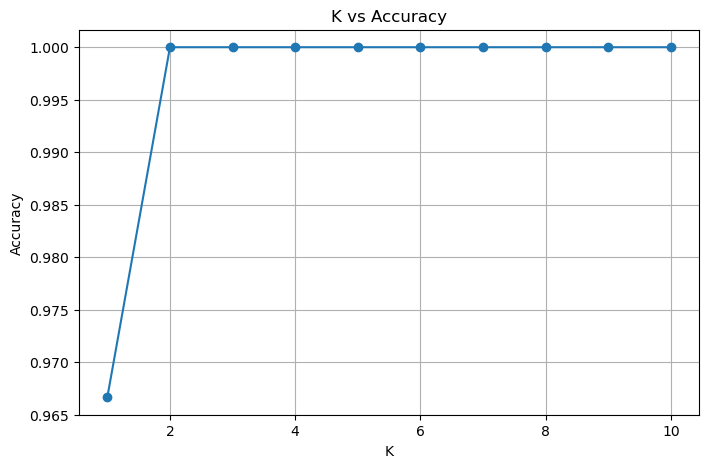

In [4]:



plt.figure(figsize=(8, 5))
plt.plot(range(1, 11), accuracies, marker='o')
plt.title("K vs Accuracy")
plt.xlabel("K")
plt.ylabel("Accuracy")
plt.grid(True)
plt.show()


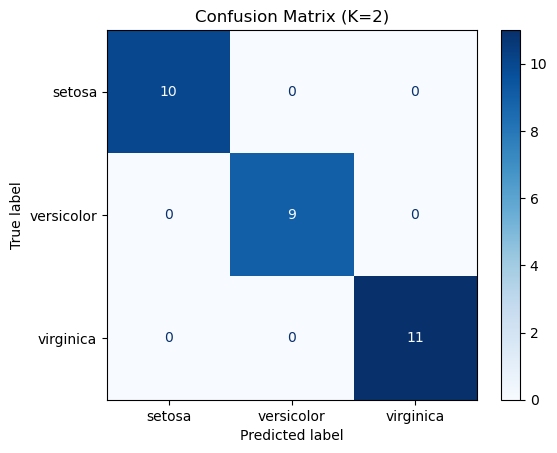

In [5]:
best_k = np.argmax(accuracies) + 1
model = KNeighborsClassifier(n_neighbors=best_k)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=iris.target_names)
disp.plot(cmap='Blues')
plt.title(f'Confusion Matrix (K={best_k})')
plt.show()


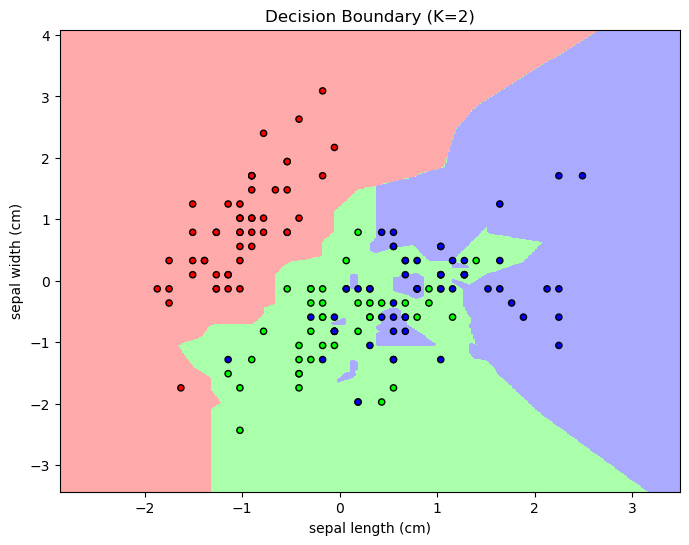

In [6]:
from matplotlib.colors import ListedColormap

# Use first 2 features for plotting
X_plot = X_scaled[:, :2]

X_train_p, X_test_p, y_train_p, y_test_p = train_test_split(X_plot, y, test_size=0.2, random_state=42)
model = KNeighborsClassifier(n_neighbors=best_k)
model.fit(X_train_p, y_train_p)

h = .02  # step size in mesh
x_min, x_max = X_plot[:, 0].min() - 1, X_plot[:, 0].max() + 1
y_min, y_max = X_plot[:, 1].min() - 1, X_plot[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.figure(figsize=(8, 6))
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])

plt.contourf(xx, yy, Z, cmap=cmap_light)
plt.scatter(X_plot[:, 0], X_plot[:, 1], c=y, cmap=cmap_bold, edgecolor='k', s=20)
plt.title(f"Decision Boundary (K={best_k})")
plt.xlabel(iris.feature_names[0])
plt.ylabel(iris.feature_names[1])
plt.show()
